In [ ]:
!pip install scikit-fuzzy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 7.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skfuzzy as fuzz

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs, load_iris
from scipy.stats import mode
from skimage import data
from skimage.color import rgb2gray


In [ ]:
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=1.2, random_state=42)
X = X.T


In [ ]:
cntr, u, _, _, _, _, fpc = fuzz.cluster.cmeans(
    X, c=3, m=2, error=0.005, maxiter=1000
)


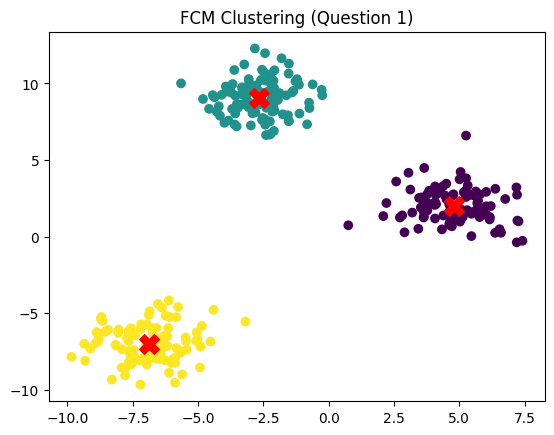

In [ ]:
labels = np.argmax(u, axis=0)
plt.scatter(X[0], X[1], c=labels, cmap='viridis')
plt.scatter(cntr[:,0], cntr[:,1], color='red', marker='X', s=200)
plt.title("FCM Clustering (Question 1)")
plt.show()


In [ ]:
print("Membership values for 5 random points:")
for i in np.random.choice(X.shape[1], 5, replace=False):
    print(f"Point {i}:", u[:, i])


Membership values for 5 random points:
Point 209: [0.01139067 0.9847885  0.00382083]
Point 100: [0.98312747 0.01074583 0.0061267 ]
Point 262: [0.00343403 0.00261684 0.99394914]
Point 171: [0.02730972 0.96038503 0.01230525]
Point 231: [0.04299574 0.03402231 0.92298195]


In [ ]:
print("FPC:", fpc)


FPC: 0.9413944034461966


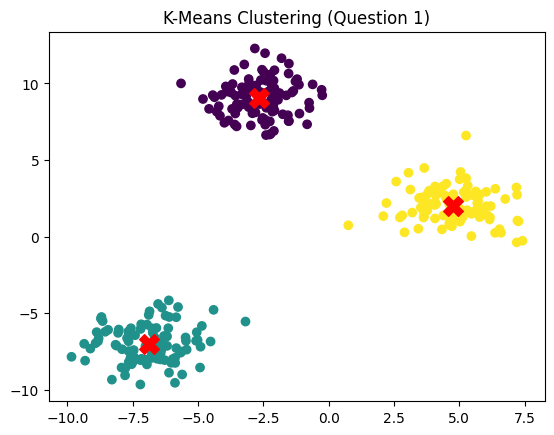

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
k_labels = kmeans.fit_predict(X.T)

plt.scatter(X[0], X[1], c=k_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            color='red', marker='X', s=200)
plt.title("K-Means Clustering (Question 1)")
plt.show()


In [ ]:
iris = load_iris()
X = iris.data
y = iris.target


In [ ]:
X_scaled = MinMaxScaler().fit_transform(X).T

cntr, u, _, _, _, _, fpc = fuzz.cluster.cmeans(
    X_scaled, c=3, m=2, error=0.005, maxiter=1000
)


In [ ]:
predicted = np.argmax(u, axis=0)
print("Predicted clusters (first 20):", predicted[:20])


Predicted clusters (first 20): [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
print("Actual labels (first 20):", y[:20])


Actual labels (first 20): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
mapping = {}

for i in range(3):
    true_labels = y[predicted == i]
    if len(true_labels) > 0:
        mapping[i] = mode(true_labels, keepdims=True).mode[0]


In [ ]:
print("FPC:", fpc)


FPC: 0.7424866247547907


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
k_preds = kmeans.fit_predict(X_scaled.T)


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

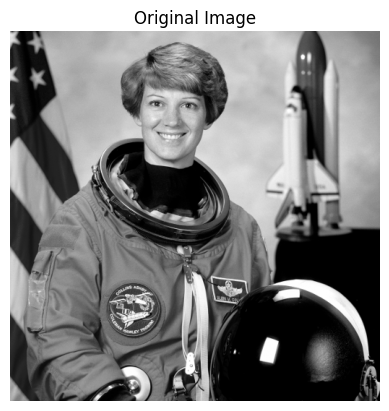

In [ ]:
image = rgb2gray(data.astronaut())
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')


In [ ]:
pixels = image.reshape(-1, 1).T


In [ ]:
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
    pixels, c=3, m=2, error=0.005, maxiter=1000
)


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

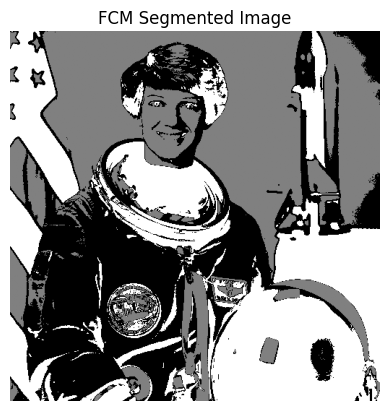

In [ ]:
segmented = np.argmax(u, axis=0).reshape(image.shape)
plt.imshow(segmented, cmap='gray')
plt.title("FCM Segmented Image")
plt.axis('off')


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

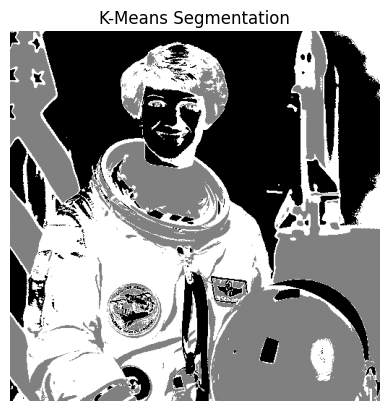

In [ ]:
kmeans = KMeans(n_clusters=3)
k_seg = kmeans.fit_predict(pixels.T).reshape(image.shape)

plt.imshow(k_seg, cmap='gray')
plt.title("K-Means Segmentation")
plt.axis('off')


In [ ]:
data = pd.DataFrame({
    'Age':[22,25,47,52,46,56,23,40,60,35],
    'Income':[15000,18000,40000,42000,38000,45000,16000,36000,50000,30000],
    'Spending':[39,81,6,77,40,76,30,60,10,55]
})


In [ ]:
X = MinMaxScaler().fit_transform(data).T


In [ ]:
cntr, u, _, _, _, _, fpc = fuzz.cluster.cmeans(
    X, c=3, m=2, error=0.005, maxiter=1000
)


In [ ]:
data['FCM_Cluster'] = np.argmax(u, axis=0)
print(data)


   Age  Income  Spending  FCM_Cluster
0   22   15000        39            2
1   25   18000        81            2
2   47   40000         6            0
3   52   42000        77            1
4   46   38000        40            1
5   56   45000        76            1
6   23   16000        30            2
7   40   36000        60            1
8   60   50000        10            0
9   35   30000        55            1


In [ ]:
print("Membership Matrix:\n", u)
print("Cluster Centers:\n", cntr)


Membership Matrix:
 [[0.01022959 0.08298212 0.91301283 0.03662014 0.36927712 0.08882721
  0.03284897 0.09577059 0.88816376 0.14015005]
 [0.01325745 0.20048739 0.05325169 0.94040505 0.52347419 0.86698906
  0.03689392 0.79390803 0.08071726 0.43073104]
 [0.97651297 0.71653049 0.03373549 0.02297481 0.10724869 0.04418373
  0.93025711 0.11032138 0.03111898 0.42911891]]
Cluster Centers:
 [[0.79987457 0.82924386 0.07690922]
 [0.68974655 0.71116623 0.82011552]
 [0.05607885 0.06512932 0.52888309]]


In [ ]:
kmeans = KMeans(n_clusters=3)
data['KMeans_Cluster'] = kmeans.fit_predict(X.T)


In [ ]:
covid = pd.DataFrame({
    'Country':['Pakistan','India','China','Iran','Afghanistan'],
    'Cases':[1580000,45000000,9900000,7600000,220000],
    'Deaths':[30600,533000,120000,145000,8000],
    'Population':[231e6,1400e6,1440e6,86e6,40e6]
})


In [ ]:
X = MinMaxScaler().fit_transform(
    covid[['Cases','Deaths','Population']]
).T


In [ ]:
cntr, u, _, _, _, _, fpc = fuzz.cluster.cmeans(
    X, c=2, m=2, error=0.005, maxiter=1000
)


In [ ]:
covid['FCM_Cluster'] = np.argmax(u, axis=0)
print(covid)


       Country     Cases  Deaths    Population  FCM_Cluster
0     Pakistan   1580000   30600  2.310000e+08            1
1        India  45000000  533000  1.400000e+09            0
2        China   9900000  120000  1.440000e+09            0
3         Iran   7600000  145000  8.600000e+07            1
4  Afghanistan    220000    8000  4.000000e+07            1


In [ ]:
print("FPC:", fpc)


FPC: 0.8742977405968922


In [ ]:
kmeans = KMeans(n_clusters=2)
covid['KMeans_Cluster'] = kmeans.fit_predict(X.T)
print(covid)

       Country     Cases  Deaths    Population  FCM_Cluster  KMeans_Cluster
0     Pakistan   1580000   30600  2.310000e+08            1               0
1        India  45000000  533000  1.400000e+09            0               1
2        China   9900000  120000  1.440000e+09            0               0
3         Iran   7600000  145000  8.600000e+07            1               0
4  Afghanistan    220000    8000  4.000000e+07            1               0
